In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.shape

(400, 5)

In [10]:
x = df.iloc[:,[2,3]]
y = df.iloc[:,4]

In [12]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [14]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [28]:
#splitting the dataset into the training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [30]:
print("Training train data : ",x_train.shape)
print("Training test data   :",x_test.shape)

Training train data :  (300, 2)
Training test data   : (100, 2)


In [38]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test  = sc_x.transform(x_test)


In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear",random_state = 0)
classifier.fit(x_train,y_train)


SVC(kernel='linear', random_state=0)

In [52]:
#predicting the test results
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [58]:
from sklearn import metrics
print("Accuracy Score with linear kernel")
print(metrics.accuracy_score(y_test,y_pred))


Accuracy Score with linear kernel
0.9


In [68]:
#using another kernal rbf
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf")
classifier.fit(x_train,y_train)
#predicting the test set results
y_pred = classifier.predict(x_test)
print("Accuracy score with default rbf kernel")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score with default rbf kernel
0.93


In [66]:
from sklearn.svm import SVC
classifier = SVC(kernel = "rbf",gamma=15,C=7,random_state=0) #gamma is used to cal all the distances high value of gamma dec the accuracy
classifier.fit(x_train,y_train) #C regularisation parameter
y_pred = classifier.predict(x_test)
print("Accuracy score on Test Data with default rbf kernel")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score with default rbf kernel
0.89


In [72]:
svc = SVC(kernel="poly",degree = 4)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)
print("Accuracy score with poly kernel and degree")
print(metrics.accuracy_score(y_test,y_pred))

Accuracy score with poly kernel and degree
0.79


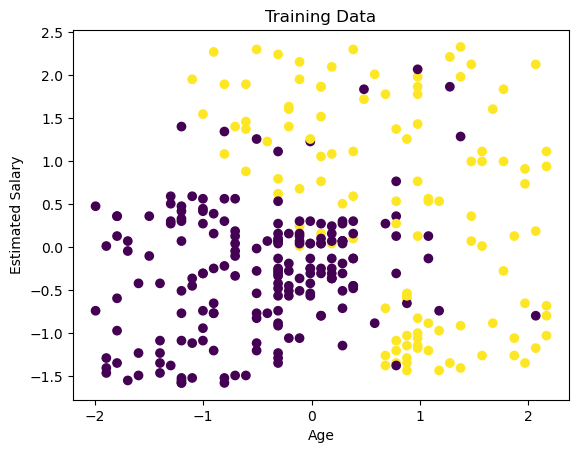

In [74]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Training Data")
plt.show()

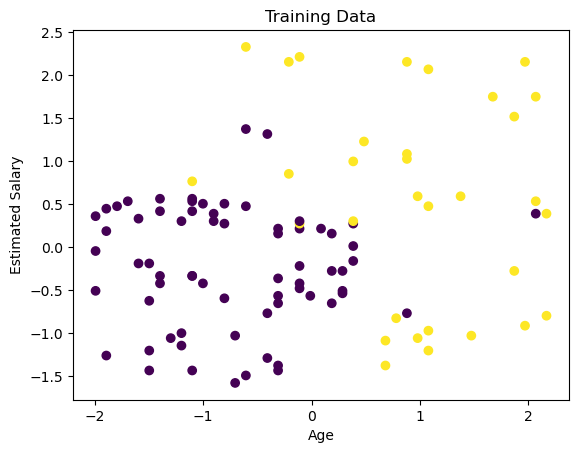

In [76]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Training Data")
plt.show()

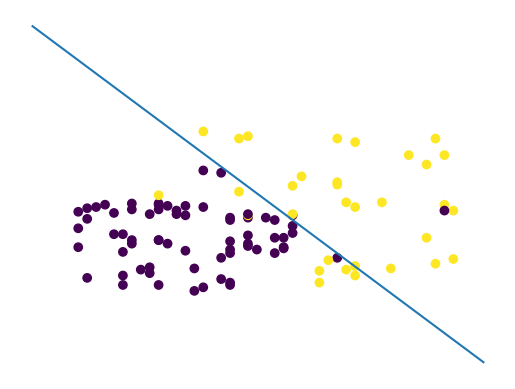

In [80]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear",random_state = 0)
classifier.fit(x_train,y_train)
#predicting the test results
y_pred = classifier.predict(x_test)
#plot data points
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
#create the hyperplane
w = classifier.coef_[0]
a =-w[0]/w[1]
xx = np.linspace(-2.5,2.5)
yy = a*xx -(classifier.intercept_[0])/w[1]

#plot hyperplane
plt.plot(xx,yy)
plt.axis("off"),plt.show();